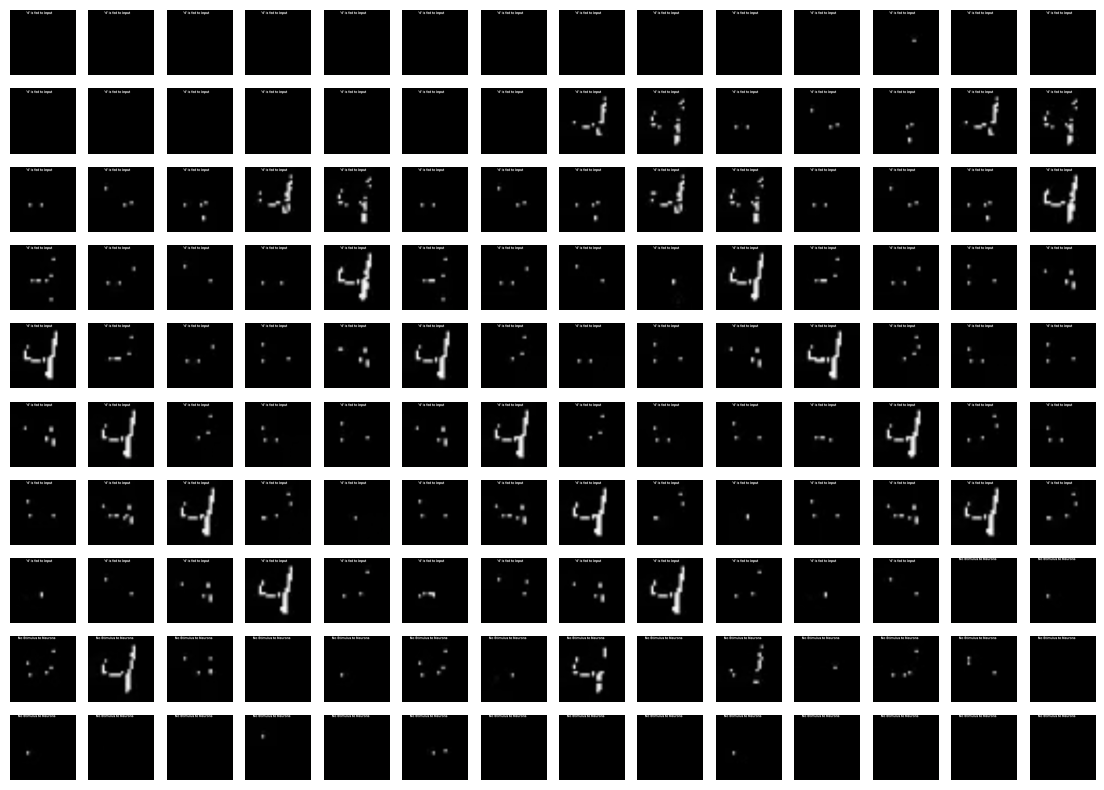

In [4]:
import cv2
import matplotlib.pyplot as plt

def plot_frames(video_path, rows=10, cols=14):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the number of frames to skip to achieve the desired grid size
    frames_to_skip = max(1, total_frames // (rows * cols))

    fig, axs = plt.subplots(rows, cols, figsize=(cols, rows))

    for i in range(rows):
        for j in range(cols):
            # Read the frame
            ret, frame = cap.read()

            # Skip frames to achieve the desired grid size
            for _ in range(frames_to_skip - 1):
                cap.read()

            if ret:
                # Convert BGR to RGB for matplotlib
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # Display the frame in the corresponding subplot
                axs[i, j].imshow(frame_rgb)
                axs[i, j].axis('off')

    plt.show()

    # Release the video capture object
    cap.release()

# Example usage
video_path = './retention_video_clipped.mp4'
plot_frames(video_path, rows=10, cols=14)
